데이터 분석 연습 - 건강정보 분석②

본 분석2에서는 세 가지 검증에 대한 내용을 다룸.

- 가설1. 흡연자의 LDL 콜레스테롤 수치와 총콜레스테롤, 트리글리세이드 수치가 비흡연자에 비해 높을까?
- 가설2. 흡연자의 HDL 콜레스테롤 수치는 비흡연자에 비해 낮을까?


- 검증1. 음주와 흡연 중 고혈압에 더 치명적인 것은? (혈압 수치가 140/90 이상일 경우 고혈압으로 간주)
- 검증2. 음주와 흡연 중 당뇨에 더 치명적인 것은? (공복 혈당이 126㎎/㎗ 이상이거나 혈색소 6.5% 이상인 사람을 당뇨병 환자로 간주) 
- ____검증2-1. 과연 흡연 중인 사람의 당뇨병 유병률은 일반인보다 두 배 가량 높을까?
- ____검증2-2. 정말로 30세 이상 한국인 중엔 7명 중 1명(13.7%) 꼴로 당뇨병 환자일까?
- 검증3. 혈압과 혈색소의 간에 상관관계가 있을까?


[기사1 - 기사 내용 중]
흡연 시 지방산 분해가 증가하면서 혈중 유리지방산이 증가하는데, 여러 논문의 메타 분석 결과, 비흡연자보다 흡연자의 총콜레스테롤, 중성지방, LDL 콜레스테롤 농도가 각각 3%, 9.1%, 1.7% 증가했으며, 좋은 콜레스테롤인 HDL 콜레스테롤은 5.7% 감소했다. 반대로 금연을 하면 HDL 콜레스테롤 수치가 유의하게 상승했다.
[출처] : https://www.hidoc.co.kr/healthstory/news/C0000465002 | 하이닥


[기사2 - 기사 내용 중]
이 연구에서 30세 이상 한국인 7명 중 1명(13.7%) 꼴인 약 480만명이 당뇨병 환자인 것으로 추산했다. 남성의 당뇨병 유병률(15.7%)이 여성(11.9%)보다 높았다. 특히 40대 남성의 당뇨병 유병률은 12.1%로, 같은 연령대 여성(5.7%)의 두 배 이상이었다. 70대 이상에선 여성의 당뇨병 유병률(33.8%)이 남성(27.2%)을 앞질렀다. 현재 흡연 중이거나 고위험 음주를 하는 사람의 당뇨병 유병률은 각각 27.4%ㆍ14.3%였다. 이는 흡연자의 당뇨병 위험이 일반인의 두 배란 의미다. 연구팀은 공복 혈당이 126㎎/㎗ 이상이거나 현재 당뇨병 치료제를 복용 중이거나 과거 당뇨병 병력 또는 당화 혈색소 6.5% 이상인 사람을 당뇨병 환자로 분류했다.
출처 : https://www.edaily.co.kr/news/read?newsId=01544886619310600&mediaCodeNo=257&OutLnkChk=Y


-데이터 정보 : 

130/80 이상 - 고혈압 위험
140/90 이상 - 고혈압

In [1]:
# 기본 라이브러리 호출
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 글씨체 및 선명도를 위한 다양한 호출
from IPython.display import set_matplotlib_formats
sns.set(font="Malgun Gothic")
set_matplotlib_formats('retina')

plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('./data/건강검진정보(2017).csv', encoding='cp949')
print(df.shape)
df.head()

(1000000, 34)


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
기준년도            1000000 non-null int64
가입자일련번호         1000000 non-null int64
성별코드            1000000 non-null int64
연령대코드(5세단위)     1000000 non-null int64
시도코드            1000000 non-null int64
신장(5Cm단위)       1000000 non-null int64
체중(5Kg단위)       1000000 non-null int64
허리둘레            999734 non-null float64
시력(좌)           999817 non-null float64
시력(우)           999811 non-null float64
청력(좌)           999842 non-null float64
청력(우)           999844 non-null float64
수축기혈압           999981 non-null float64
이완기혈압           999982 non-null float64
식전혈당(공복혈당)      999958 non-null float64
총콜레스테롤          999957 non-null float64
트리글리세라이드        999955 non-null float64
HDL콜레스테롤        999956 non-null float64
LDL콜레스테롤        997088 non-null float64
혈색소             999948 non-null float64
요단백             995408 non-null float64
혈청크레아티닌         999957 non-null float64
(혈청지오티)AST     

In [5]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [6]:
df[['수축기혈압','이완기혈압']].head()

,수축기혈압,이완기혈압
0,120.0,80.0
1,130.0,82.0
2,120.0,70.0
3,145.0,87.0
4,138.0,82.0


In [7]:
a = df[(df['수축기혈압'] >= 130) & (df['수축기혈압'] < 140)]  # 수축기 혈얍이 130이상, 140 미만
df_high = a[(a['이완기혈압'] >= 80)  & (a['이완기혈압'] < 90)]
print(df_high.shape)
df_high.head()

(139009, 34)


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
7,2017,8,1,8,48,175,65,84.2,1.2,1.0,...,35.0,3.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126
12,2017,13,2,12,41,150,55,72.3,1.2,0.9,...,31.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
35,2017,36,1,12,48,170,60,75.0,0.8,0.8,...,15.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [8]:
df_very_high = df[(df['수축기혈압'] > 130) & (a['이완기혈압'] > 90)]
print(df_very_high.shape)
df_very_high.head()

(9516, 34)


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
9,2017,10,1,9,41,175,75,82.0,1.5,1.5,...,16.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
40,2017,41,1,12,11,155,65,85.5,1.0,1.0,...,62.0,3.0,1.0,1,NaN,NaN,NaN,NaN,2.0,20181126
155,2017,156,2,17,41,145,40,75.0,0.3,0.5,...,11.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
397,2017,398,1,11,41,180,85,92.0,0.8,9.9,...,30.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
517,2017,518,2,9,43,150,60,76.0,1.5,1.0,...,14.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


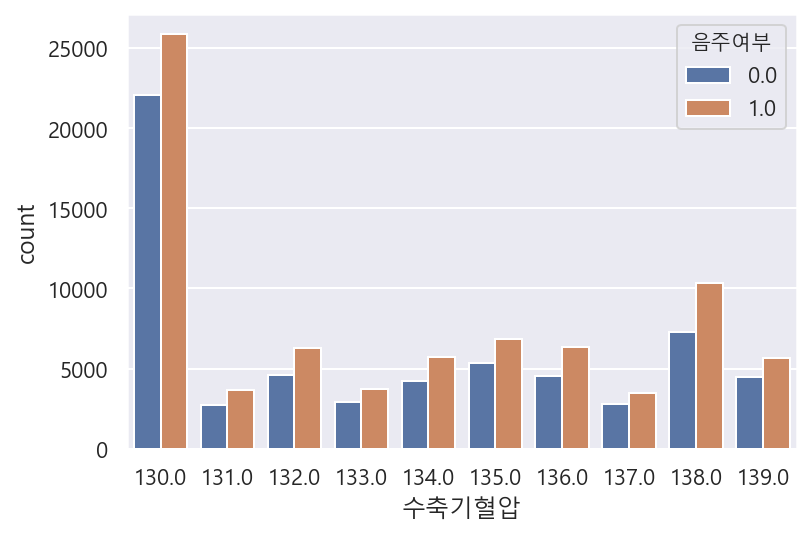

In [9]:
sns.countplot(data=df_high, x='수축기혈압', hue='음주여부')

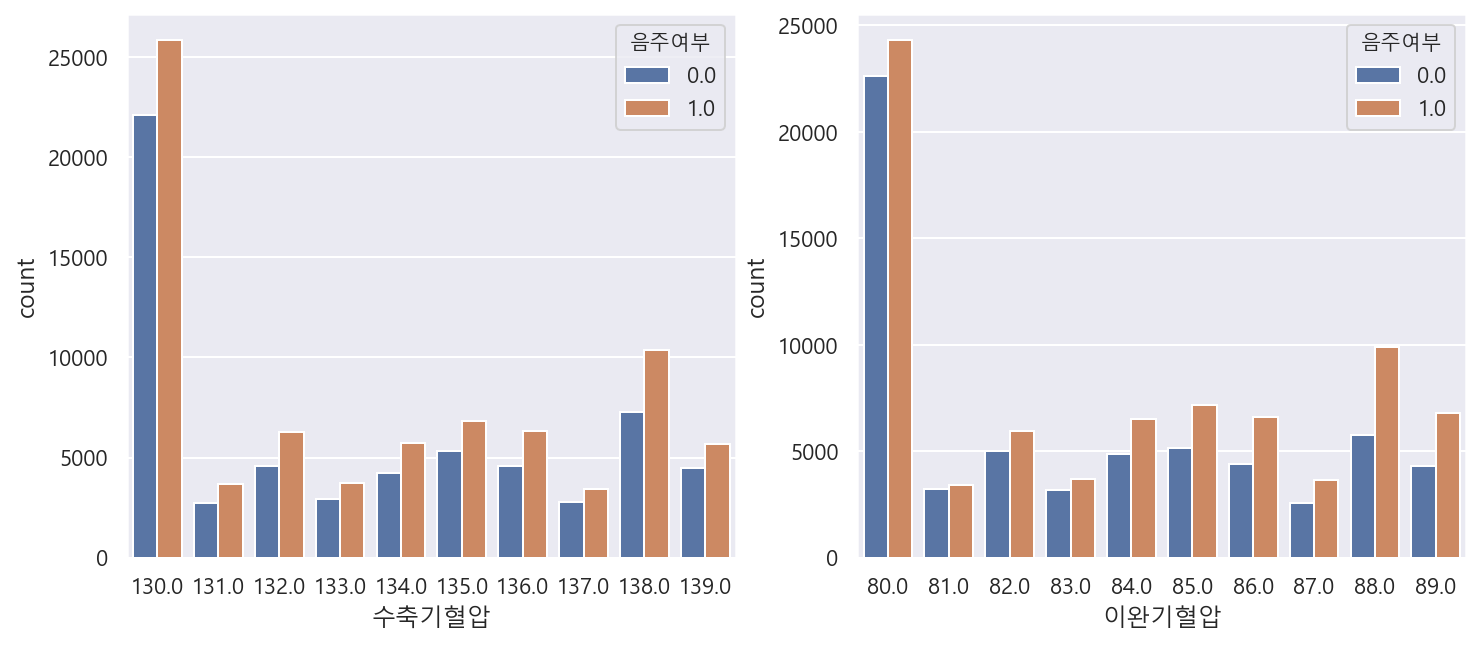

In [10]:
figure, (ax1, ax2)=plt.subplots(ncols=2)

figure.set_size_inches(12,5)

sns.countplot(data=df_high, x='수축기혈압', hue='음주여부', ax=ax1)
sns.countplot(data=df_high, x='이완기혈압', hue='음주여부', ax=ax2)

# 흡연상태에 따른 혈압차이 분석

In [11]:
print(df_high[df_high['흡연상태'] == 1].shape)
print(df_high[df_high['흡연상태'] == 2].shape)
print(df_high[df_high['흡연상태'] == 3].shape)

a1 = df_high[df_high['흡연상태'] == 1].head(30000)
a2 = df_high[df_high['흡연상태'] == 2].head(30000)
a3 = df_high[df_high['흡연상태'] == 3].head(30000)

smoker = pd.concat([a1,a2,a3])
smoker.shape

(71532, 34)
(31101, 34)
(36358, 34)


(90000, 34)

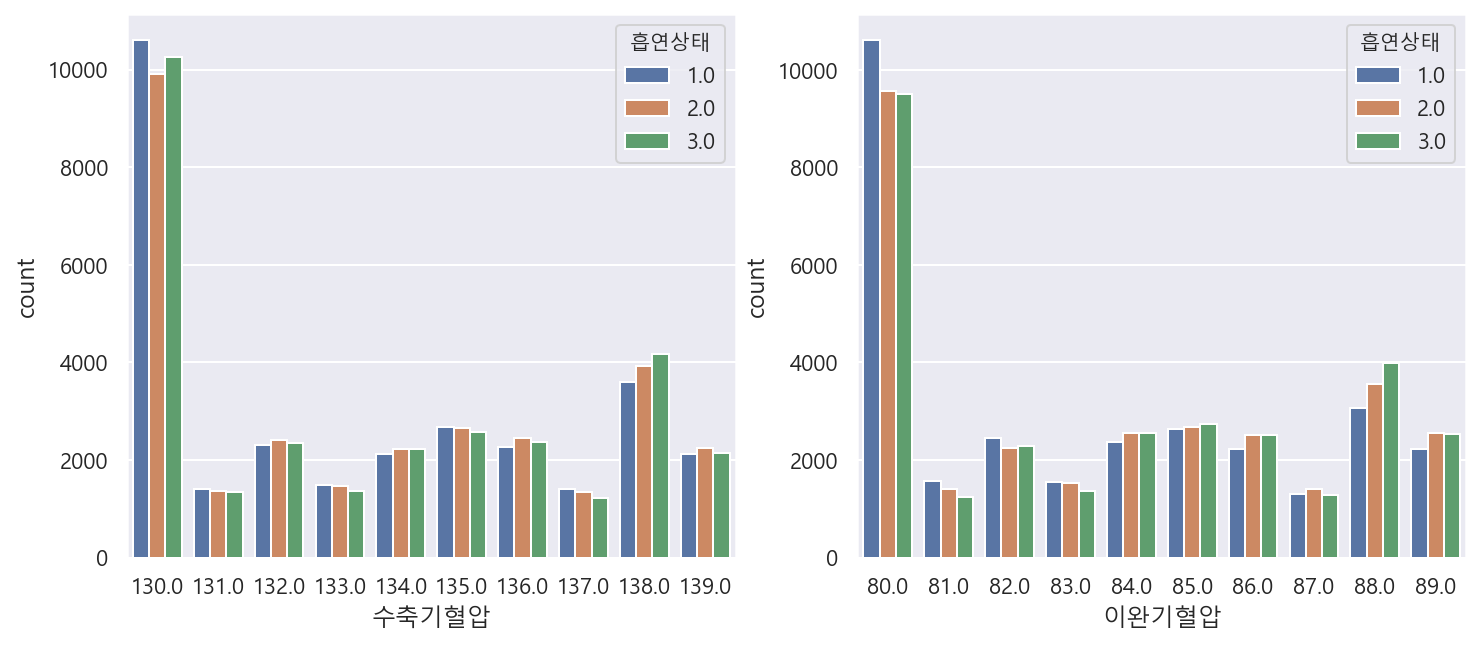

In [12]:
figure, (ax1, ax2)=plt.subplots(ncols=2)

figure.set_size_inches(12,5)

sns.countplot(data=smoker, x='수축기혈압', hue='흡연상태', ax=ax1)
sns.countplot(data=smoker, x='이완기혈압', hue='흡연상태', ax=ax2)

↑흡연상태에 따른 혈압은 크게 영향이 없이 보인다.

# 검증2. 음주와 흡연 중 당뇨에 더 치명적인 것은? (공복 혈당이 126㎎/㎗ 이상이거나 혈색소 6.5% 이상인 사람을 당뇨병 환자로 간주)

(공복 혈당이 126㎎/㎗ 이상이거나 혈색소 6.5% 이상인 사람을 당뇨병 환

In [13]:
df_diabetes = df[(df['식전혈당(공복혈당)'] > 126)]
df_diabetes.shape

(74258, 34)

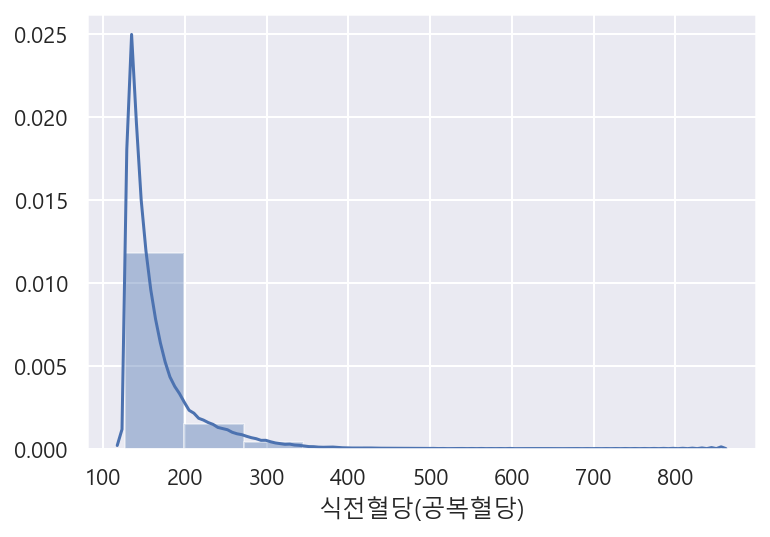

In [14]:
sns.distplot(df_diabetes['식전혈당(공복혈당)'], bins= 10)

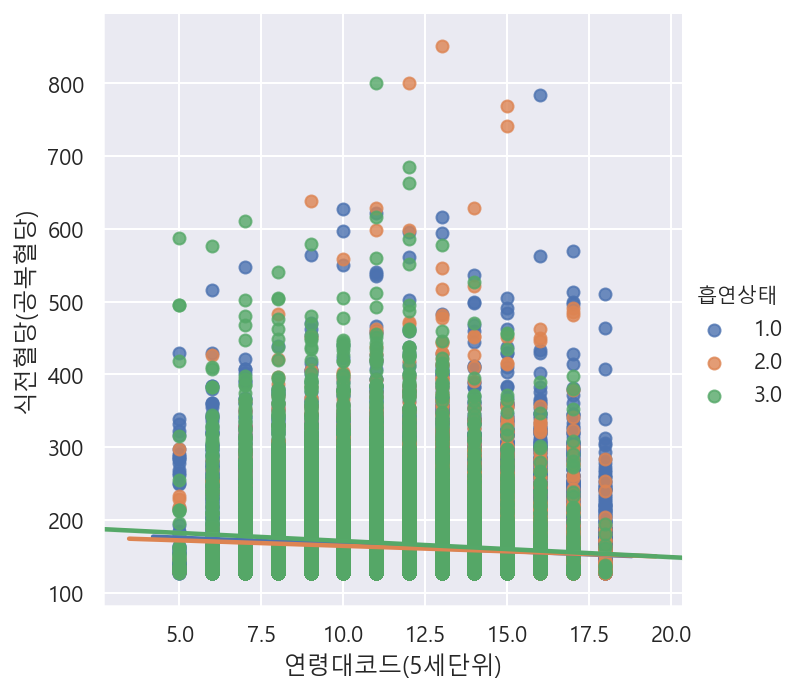

In [15]:
sns.lmplot(data=df_diabetes, x='연령대코드(5세단위)', y='식전혈당(공복혈당)', hue='흡연상태')

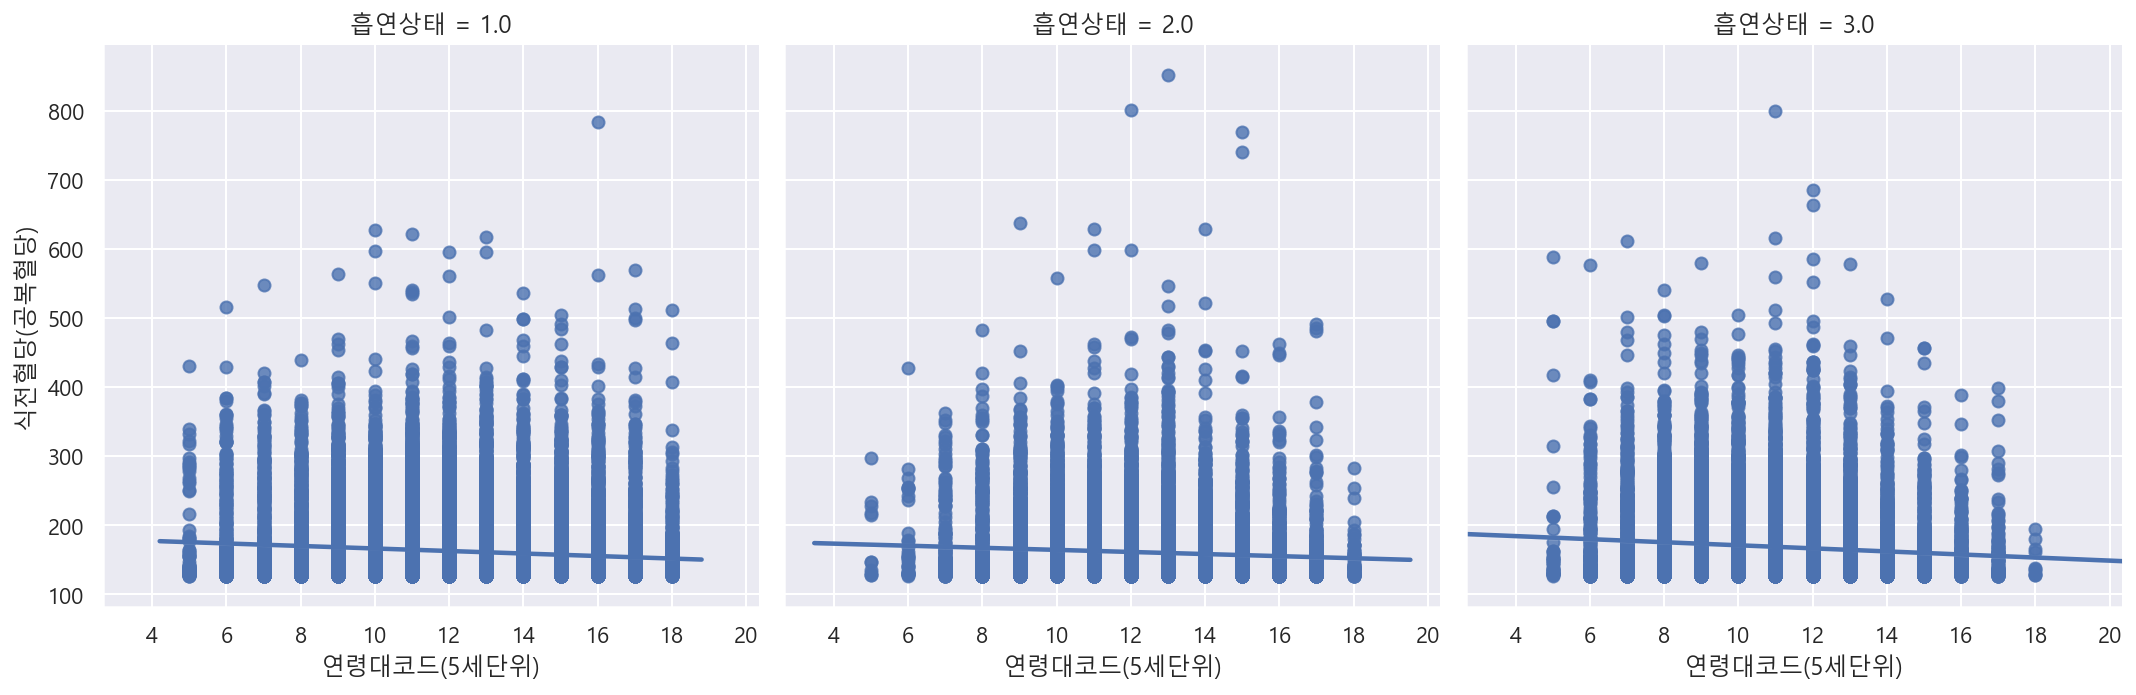

In [16]:
sns.lmplot(data=df_diabetes, x='연령대코드(5세단위)', y='식전혈당(공복혈당)', col='흡연상태')

In [17]:
print(df_diabetes[df_diabetes['흡연상태']==1].shape)
print(df_diabetes[df_diabetes['흡연상태']==2].shape)
print(df_diabetes[df_diabetes['흡연상태']==3].shape)

(36783, 34)
(17854, 34)
(19613, 34)


In [18]:
df_diabetes_smoker1 = df_diabetes[df_diabetes['흡연상태']==1].sample(10000, random_state=1)
df_diabetes_smoker2 = df_diabetes[df_diabetes['흡연상태']==2].sample(10000, random_state=1)
df_diabetes_smoker3 = df_diabetes[df_diabetes['흡연상태']==3].sample(10000, random_state=1)

In [19]:
print(df_diabetes_smoker1.shape)
print(df_diabetes_smoker2.shape)
print(df_diabetes_smoker3.shape)

(10000, 34)
(10000, 34)
(10000, 34)


In [20]:
df_diabetes_smoker123 = pd.concat([df_diabetes_smoker1,df_diabetes_smoker2,df_diabetes_smoker3])
print(df_diabetes_smoker123.shape)
df_diabetes_smoker123.head()

(30000, 34)


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
67907,2017,67908,2,14,41,150,50,74.0,0.8,0.7,...,17.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
419284,2017,419285,2,10,41,150,45,68.0,1.5,1.2,...,20.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
330588,2017,330589,2,11,30,155,65,82.0,1.2,0.9,...,43.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
325,2017,326,2,15,11,150,60,95.0,9.9,0.2,...,12.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
556957,2017,556958,2,11,41,155,60,83.0,0.6,0.7,...,12.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126


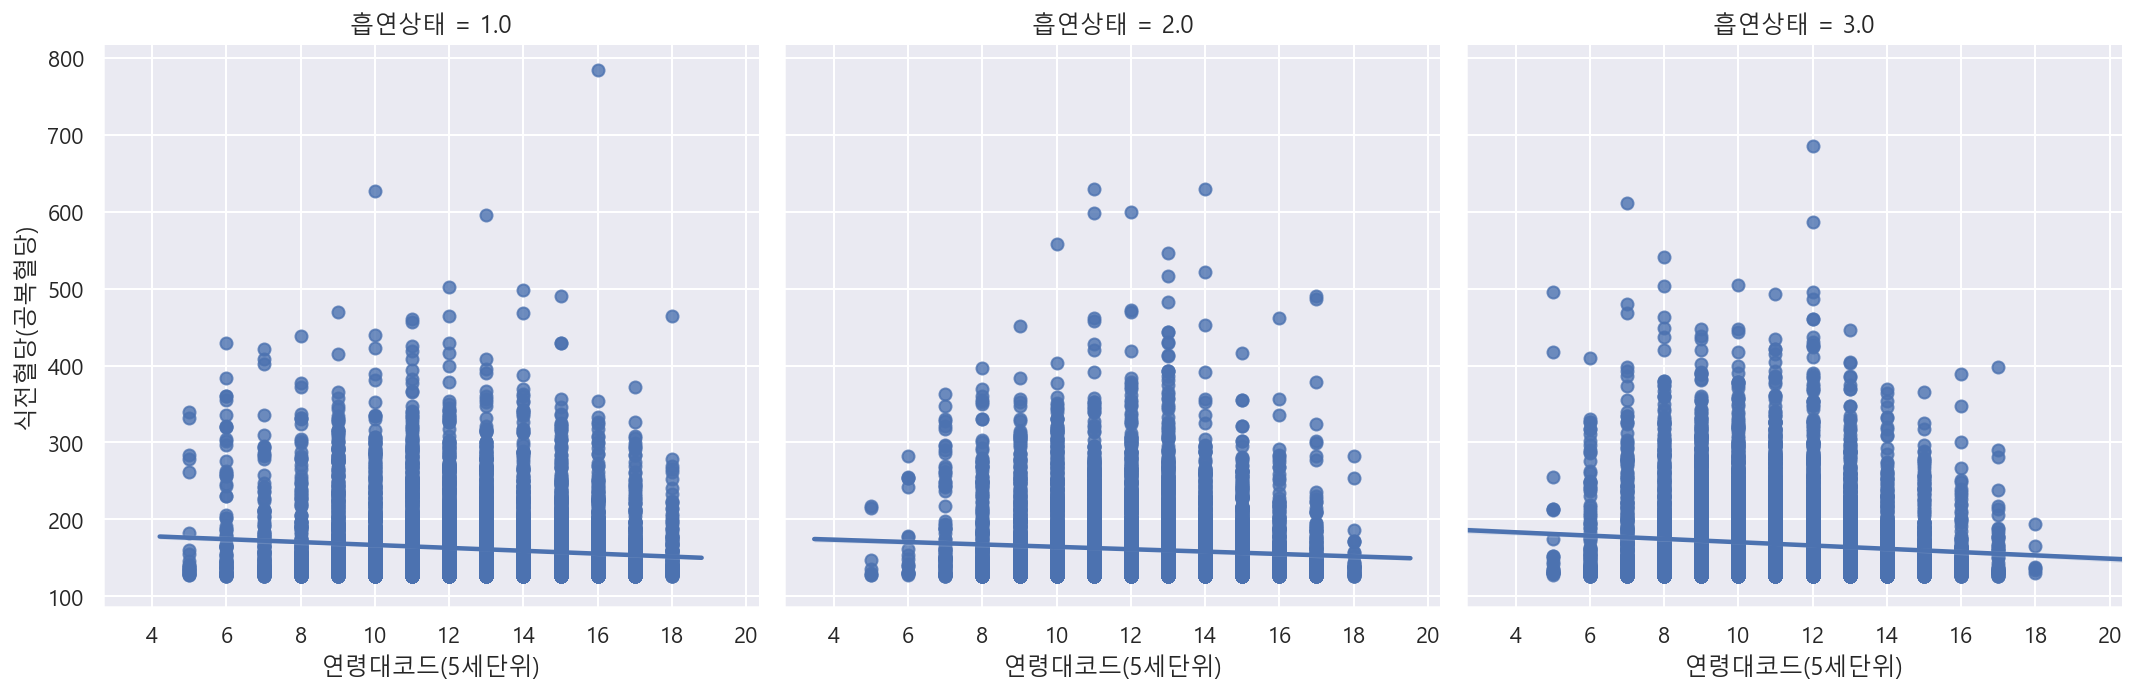

In [21]:
sns.lmplot(data=df_diabetes_smoker123, x='연령대코드(5세단위)', y='식전혈당(공복혈당)', col='흡연상태')

In [22]:
print(df_diabetes[df_diabetes['흡연상태']==1]['식전혈당(공복혈당)'].mean())
print(df_diabetes[df_diabetes['흡연상태']==2]['식전혈당(공복혈당)'].mean())
print(df_diabetes[df_diabetes['흡연상태']==3]['식전혈당(공복혈당)'].mean())

161.3120463257483
160.8542063403159
168.65594248712588


결론 : 시각화 그래프와 수치를 비교한 평균 수치를 비교한 결과 흡연자가 비흡연자에 비해 확실히 높은 식전 혈당 수치를 나타냄을 확인할 수 있다.

# 검증2-2. 정말로 30세 이상 한국인 중엔 7명 중 1명(13.7%) 꼴로 당뇨병 환자일까?

In [23]:
df_over30 = df[df['연령대코드(5세단위)']>=6]

In [24]:
df_over30.shape

(977848, 34)

In [25]:
df_over30[df_over30['식전혈당(공복혈당)']>126].shape

(74134, 34)

In [26]:
977848/74134

13.190277065853724

결론 : 분석 결과 30대 이상 한국인의 당뇨 환자 비율은 13.19%로 나왔다.

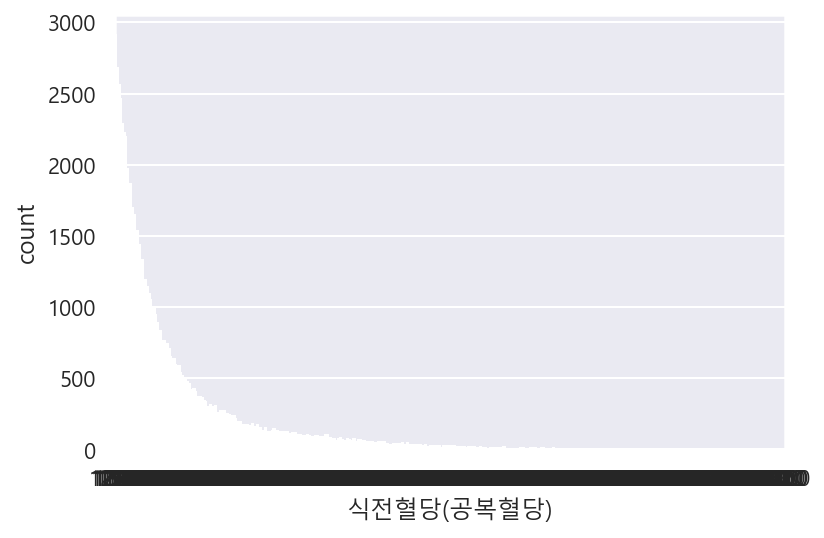

In [27]:
sns.countplot(data=df_over30[df_over30['식전혈당(공복혈당)']>126], x='식전혈당(공복혈당)')

# 검증3. 혈압과 혈색소의 간에 상관관계가 있을까?

In [28]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [29]:
columns = ['성별코드', '신장(5Cm단위)','체중(5Kg단위)','수축기혈압', '이완기혈압', 
   '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 
   'LDL콜레스테롤', '혈색소', '흡연상태', '음주여부']

In [30]:
df_subset = df[columns]
df_corr = df_subset.corr()
df_corr

,성별코드,신장(5Cm단위),체중(5Kg단위),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,흡연상태,음주여부
성별코드,1.000000,-0.722248,-0.581635,-0.177030,-0.199930,-0.118355,0.021788,-0.215127,0.227018,0.004903,-0.668790,-0.591158,-0.368333
신장(5Cm단위),-0.722248,1.000000,0.669034,0.035248,0.109110,0.021410,-0.022194,0.137397,-0.131003,-0.015006,0.531672,0.467391,0.374772
체중(5Kg단위),-0.581635,0.669034,1.000000,0.250976,0.278272,0.138548,0.064459,0.282290,-0.253811,0.068337,0.499724,0.366878,0.264686
수축기혈압,-0.177030,0.035248,0.250976,1.000000,0.741290,0.183302,0.068939,0.185457,-0.099263,0.033760,0.166794,0.085436,0.033440
이완기혈압,-0.199930,0.109110,0.278272,0.741290,1.000000,0.136296,0.112479,0.198356,-0.083653,0.067225,0.242496,0.127458,0.101245
식전혈당(공복혈당),-0.118355,0.021410,0.138548,0.183302,0.136296,1.000000,0.013207,0.204191,-0.100693,-0.029916,0.101468,0.086782,0.014593
총콜레스테롤,0.021788,-0.022194,0.064459,0.068939,0.112479,0.013207,1.000000,0.272314,0.144341,0.877459,0.122666,0.012771,0.020524
트리글리세라이드,-0.215127,0.137397,0.282290,0.185457,0.198356,0.204191,0.272314,1.000000,-0.237126,0.029734,0.240298,0.215926,0.104541
HDL콜레스테롤,0.227018,-0.131003,-0.253811,-0.099263,-0.083653,-0.100693,0.144341,-0.237126,1.000000,0.021896,-0.160695,-0.142443,0.037870
LDL콜레스테롤,0.004903,-0.015006,0.068337,0.033760,0.067225,-0.029916,0.877459,0.029734,0.021896,1.000000,0.102522,-0.011972,-0.043210


In [31]:
df_corr.head()

,성별코드,신장(5Cm단위),체중(5Kg단위),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,흡연상태,음주여부
성별코드,1.000000,-0.722248,-0.581635,-0.177030,-0.199930,-0.118355,0.021788,-0.215127,0.227018,0.004903,-0.668790,-0.591158,-0.368333
신장(5Cm단위),-0.722248,1.000000,0.669034,0.035248,0.109110,0.021410,-0.022194,0.137397,-0.131003,-0.015006,0.531672,0.467391,0.374772
체중(5Kg단위),-0.581635,0.669034,1.000000,0.250976,0.278272,0.138548,0.064459,0.282290,-0.253811,0.068337,0.499724,0.366878,0.264686
수축기혈압,-0.177030,0.035248,0.250976,1.000000,0.741290,0.183302,0.068939,0.185457,-0.099263,0.033760,0.166794,0.085436,0.033440
이완기혈압,-0.199930,0.109110,0.278272,0.741290,1.000000,0.136296,0.112479,0.198356,-0.083653,0.067225,0.242496,0.127458,0.101245


In [32]:
df_corr['수축기혈압'].sort_values(ascending = False)

수축기혈압         1.000000
이완기혈압         0.741290
체중(5Kg단위)     0.250976
트리글리세라이드      0.185457
식전혈당(공복혈당)    0.183302
혈색소           0.166794
흡연상태          0.085436
총콜레스테롤        0.068939
신장(5Cm단위)     0.035248
LDL콜레스테롤      0.033760
음주여부          0.033440
HDL콜레스테롤     -0.099263
성별코드         -0.177030
Name: 수축기혈압, dtype: float64

In [33]:
df_corr['이완기혈압'].sort_values(ascending = False)

이완기혈압         1.000000
수축기혈압         0.741290
체중(5Kg단위)     0.278272
혈색소           0.242496
트리글리세라이드      0.198356
식전혈당(공복혈당)    0.136296
흡연상태          0.127458
총콜레스테롤        0.112479
신장(5Cm단위)     0.109110
음주여부          0.101245
LDL콜레스테롤      0.067225
HDL콜레스테롤     -0.083653
성별코드         -0.199930
Name: 이완기혈압, dtype: float64

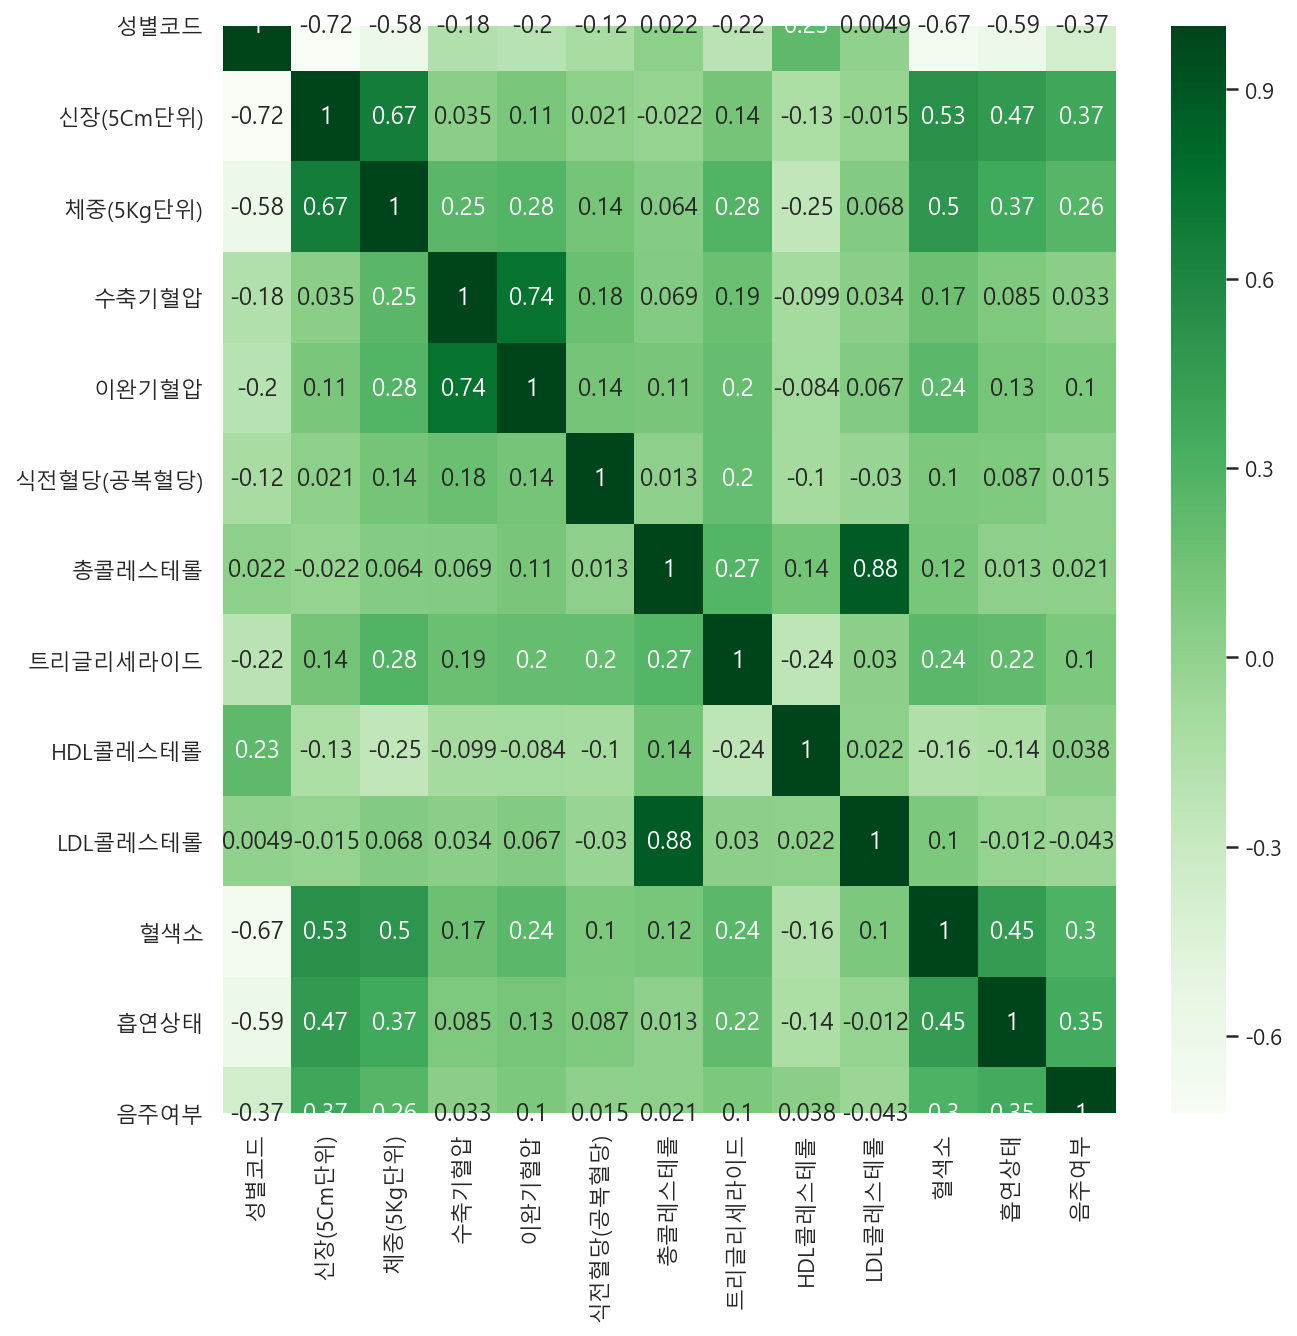

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, cmap='Greens')

결로 : 이완기 혈압과 혈색소 간의 상관계수는 0.24, 수축기 혈압과 혈색소 간의 상관계수는 0.16으로 크게 의미있는 상관관계는 아닌것으로 판단된다.

# <실패작들>

In [ ]:
sns.countplot(data=df_over30[df_over30['식전혈당(공복혈당)']>126], x='')

In [24]:
df_over30['당뇨여부']=''

C:\Users\44455\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_over30.head(20)

In [28]:
bb = df_over30.head(20)

In [31]:
for n in bb.index :
    if bb.iloc[n]['식전혈당(공복혈당)'] > 126 :
        bb.iloc[n]['당뇨여부'] = '1'
    else :
        bb.iloc[n]['당뇨여부'] = '0'

C:\Users\44455\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\44455\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
